In [27]:
import pandas as pd
import numpy as np
import torch
import sys
import timesead
import json
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [83]:
#pour les fichiers json
with open('C:/Users/pellerinc/TimeSeAD-master/data/SMAP/smap_checksums.json') as f:
    data = json.load(f)

dff = pd.DataFrame(list(data.items()), columns=['file', 'checksum'])

In [66]:
df.head()

,Fault,MAP,TPS,Force,Power,RPM,Consumption L/H,Consumption L/100KM,Speed,CO,HC,CO2,O2,Lambda,AFR
0,0,3.549,1.889,7.428,5.227,1192.769,3.057,11.720,24.901,0.460,196.089,14.356,1.080,1.047,15.385
1,0,3.559,1.899,7.646,5.327,1145.191,2.914,11.276,25.030,0.478,196.283,14.492,1.107,1.083,15.926
2,0,3.539,1.899,7.578,5.100,1208.505,2.976,11.926,24.213,0.464,200.367,14.443,1.099,1.072,15.754
3,0,3.519,1.889,7.371,5.255,1164.127,2.908,11.786,24.407,0.471,195.345,13.853,1.076,1.006,14.787
4,0,3.549,1.879,7.405,5.177,1172.032,2.898,12.169,24.875,0.468,194.979,13.752,1.060,0.984,14.470


In [101]:
df = pd.read_csv('C:/Users/pellerinc/EngineFaultDB-main/EngineFaultDB-main/EngineFaultDB_Final.csv')

In [87]:
df.shape

(55999, 15)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55999 entries, 0 to 55998
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fault                55999 non-null  int64  
 1   MAP                  55999 non-null  float64
 2   TPS                  55999 non-null  float64
 3   Force                55999 non-null  float64
 4   Power                55999 non-null  float64
 5   RPM                  55999 non-null  float64
 6   Consumption L/H      55999 non-null  float64
 7   Consumption L/100KM  55999 non-null  float64
 8   Speed                55999 non-null  float64
 9   CO                   55999 non-null  float64
 10  HC                   55999 non-null  float64
 11  CO2                  55999 non-null  float64
 12  O2                   55999 non-null  float64
 13  Lambda               55999 non-null  float64
 14  AFR                  55999 non-null  float64
dtypes: float64(14), int64(1)
memory usag

In [47]:
df.describe()

,Fault,MAP,TPS,Force,Power,RPM,Consumption L/H,Consumption L/100KM,Speed,CO,HC,CO2,O2,Lambda,AFR
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,1.482187,1.832515,1.395269,286.691705,5.657126,2398.053774,4.497634,8.939794,51.688740,1.932430,188.446083,13.035230,0.585910,0.963907,14.169408
std,1.149430,0.837786,0.906950,378.774917,7.684147,932.008680,2.221497,3.154110,20.140345,1.988789,111.047015,1.046567,0.223713,0.065973,0.969802
min,0.000000,0.453000,0.382000,2.580000,0.465000,1066.452000,1.917000,5.187000,22.757000,0.421000,1.787000,8.649000,0.203000,0.695000,10.210000
25%,0.000000,1.217000,0.901000,76.848500,0.994000,1830.200500,2.981000,6.573000,39.412000,0.641000,158.803000,12.842000,0.415000,0.937000,13.780000
50%,2.000000,1.543000,1.013000,92.500000,2.398000,2105.588000,3.824000,8.068000,45.393000,1.129000,178.265000,13.242000,0.533000,0.977000,14.365000
75%,3.000000,1.940000,1.258000,257.989500,4.696000,2761.373500,5.144500,9.924000,59.508000,2.455000,203.678000,13.639000,0.789000,1.008000,14.823000
max,3.000000,4.547000,4.048000,1537.118000,33.946000,5013.402000,14.810000,20.043000,107.539000,10.132000,975.657000,15.129000,1.151000,1.149000,16.893000


In [99]:
df.isnull().sum() #verifications valeurs manquantes

Fault                  0
MAP                    0
TPS                    0
Force                  0
Power                  0
RPM                    0
Consumption L/H        0
Consumption L/100KM    0
Speed                  0
CO                     0
HC                     0
CO2                    0
O2                     0
Lambda                 0
AFR                    0
dtype: int64

In [102]:
df.nunique() #verification doublons

Fault                      4
MAP                      259
TPS                      159
Force                  40476
Power                  10119
RPM                    54819
Consumption L/H         6808
Consumption L/100KM     9208
Speed                  30113
CO                      5133
HC                     41136
CO2                     5242
O2                       889
Lambda                   416
AFR                     5054
dtype: int64

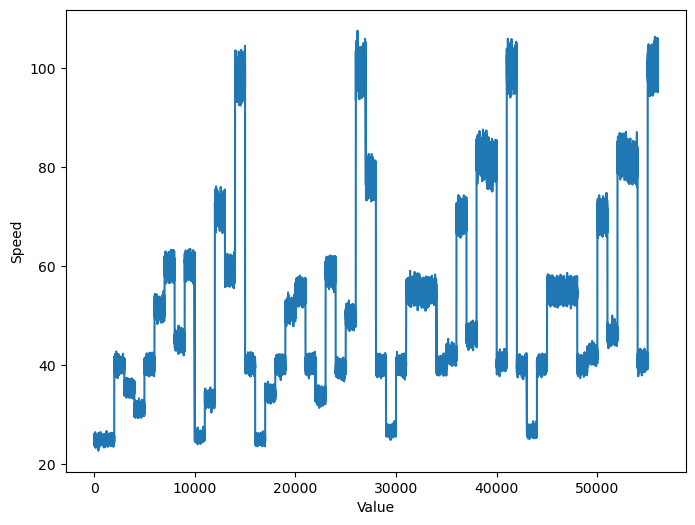

In [48]:
plt.figure(figsize=(8, 6))
plt.plot(df['Speed'])
plt.xlabel('Value')
plt.ylabel('Speed')
plt.show()

In [58]:
df.info() #surtout pour identifier potentielles valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55999 entries, 0 to 55998
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fault                55999 non-null  int64  
 1   MAP                  55999 non-null  float64
 2   TPS                  55999 non-null  float64
 3   Force                55999 non-null  float64
 4   Power                55999 non-null  float64
 5   RPM                  55999 non-null  float64
 6   Consumption L/H      55999 non-null  float64
 7   Consumption L/100KM  55999 non-null  float64
 8   Speed                55999 non-null  float64
 9   CO                   55999 non-null  float64
 10  HC                   55999 non-null  float64
 11  CO2                  55999 non-null  float64
 12  O2                   55999 non-null  float64
 13  Lambda               55999 non-null  float64
 14  AFR                  55999 non-null  float64
dtypes: float64(14), int64(1)
memory usag

In [ ]:
df_cleaned = df.dropna() #supprime les valeurs manquantes
df_imputed = df.fillna(data.mean()) #remplace les valeurs manquantes avec la moyenne

In [26]:
#ATTENTION : ne pas utiliser sans reflechir (outliers peuvent etre importants a garder pour entrainement)
def remove_outliers(df): #retire les valeurs aberrantes avec la methode de l'écart interquartile 
    for column in df.select_dtypes(include=[np.number]).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df
df_cleaned = remove_outliers(df)

In [106]:
#attention a garder division temporelle pour les timeseries
X = df.drop(columns=['Fault'])  # Toutes les colonnes sauf 'Fault'
y = df['Fault']  # La colonne 'Fault'

# Divise les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
scaler = MinMaxScaler() #normalise les données
#Préférable lorsque vous avez besoin de données dans une plage spécifique, surtout pour les algorithmes qui nécessitent des données normalisées dans une plage fixe.
# Ajuste le scaler sur les données d'entraînement et transforme
X_train_MM = scaler.fit_transform(X_train)
# Transforme uniquement les données de test
X_test_MM = scaler.transform(X_test)

In [71]:
scaler = StandardScaler() #standardise les données
#Préférable pour des algorithmes sensibles à la variance des caractéristiques, comme les régressions linéaires, les SVM, et les algorithmes basés sur la distance (comme K-means).
# Ajuste le scaler sur les données d'entraînement et transforme
X_train_SS = scaler.fit_transform(X_train)
# Transforme uniquement les données de test
X_test_SS = scaler.transform(X_test)

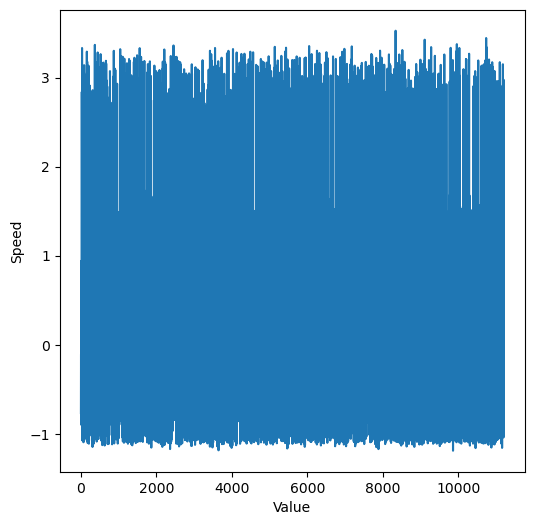

In [105]:
X_test_df = pd.DataFrame(X_test_SS, columns=X.columns)
plt.figure(figsize=(6,6))
plt.plot(X_test_df['Speed'])
plt.xlabel('Value')
plt.ylabel('Speed')
plt.show()

In [82]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (44799, 14)
X_test shape: (11200, 14)
y_train shape: (44799,)
y_test shape: (11200,)


In [88]:
df_normalized_todf.head()

,Fault,MAP,TPS,Force,Power,RPM,Consumption L/H,Consumption L/100KM,Speed,CO,HC,CO2,O2,Lambda,AFR
0,0.0,0.756229,0.411075,0.003159,0.142230,0.032004,0.088420,0.439755,0.025288,0.004016,0.199515,0.880710,0.925105,0.775330,0.774353
1,0.0,0.758671,0.413803,0.003301,0.145217,0.019949,0.077329,0.409868,0.026810,0.005870,0.199715,0.901698,0.953586,0.854626,0.855305
2,0.0,0.753786,0.413803,0.003257,0.138437,0.035991,0.082138,0.453621,0.017173,0.004428,0.203908,0.894136,0.945148,0.830396,0.829568
3,0.0,0.748901,0.411075,0.003122,0.143066,0.024747,0.076863,0.444198,0.019462,0.005149,0.198751,0.803086,0.920886,0.685022,0.684872
4,0.0,0.756229,0.408347,0.003144,0.140737,0.026750,0.076088,0.469978,0.024982,0.004840,0.198376,0.787500,0.904008,0.636564,0.637438


In [96]:
df_standardized_todf.head()

,Fault,MAP,TPS,Force,Power,RPM,Consumption L/H,Consumption L/100KM,Speed,CO,HC,CO2,O2,Lambda,AFR
0,-1.289509,2.048853,0.544390,-0.737288,-0.055976,-1.293224,-0.648503,0.881463,-1.330066,-0.740372,0.068827,1.262014,2.208607,1.259517,1.253454
1,-1.289509,2.060789,0.555417,-0.736712,-0.042962,-1.344273,-0.712874,0.740693,-1.323660,-0.731321,0.070574,1.391964,2.329298,1.805203,1.811305
2,-1.289509,2.036917,0.555417,-0.736892,-0.072504,-1.276339,-0.684965,0.946775,-1.364226,-0.738360,0.107351,1.345144,2.293538,1.638465,1.633948
3,-1.289509,2.013044,0.544390,-0.737438,-0.052332,-1.323955,-0.715575,0.902388,-1.354594,-0.734840,0.062127,0.781391,2.190727,0.638042,0.636828
4,-1.289509,2.048853,0.533364,-0.737349,-0.062483,-1.315474,-0.720077,1.023818,-1.331356,-0.736349,0.058831,0.684884,2.119206,0.304568,0.309955


In [23]:
# Convertit les ensembles en tenseurs (attention au type de donnees de y dans dtype)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

print(f"X_train_tensor shape: {X_train_tensor.shape}")
print(f"y_train_tensor shape: {y_train_tensor.shape}")

X_train_tensor shape: torch.Size([44799, 14])
y_train_tensor shape: torch.Size([44799])


In [ ]:
#entrainement du modele